#### Loading dataset

In [1]:
setwd('/fs/cbcb-lab/rob/students/noor/Uncertainity/treeTerminusScripts')
suppressPackageStartupMessages(source("tree_helper_function.R"))
suppressPackageStartupMessages(source("tree_term_climb.R"))
suppressPackageStartupMessages(library(beaveR))
suppressPackageStartupMessages(library(TreeSummarizedExperiment))

saveDir <- "environment/Chimp/DE"
load(file.path(saveDir, "tseChimp.RData"))
load(file.path(saveDir, "yAll.RData"))
load(file.path(saveDir, "y.RData"))
load(file.path(saveDir, "yg.RData"))
treeCons <- rowTree(tseChimp)
nleaves <- length(treeCons$tip)

load("treeDE_Paper_Images/ChimpBrain/treeDECommonInds.RData")
load("treeDE_Paper_Images/ChimpBrain/detNodes.RData")

In [2]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggtree))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library("grid"))
suppressPackageStartupMessages(library("ggplotify"))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(plyranges))
suppressPackageStartupMessages(library(plotgardener))
library(org.Pt.eg.db)

txdb <- GenomicFeatures::makeTxDbFromGFF("/fs/cbcb-lab/rob/students/noor/Uncertainity/ChimpData/refseq_ind/Pan_troglodytes.Pan_tro_3.0.104.gtf")
txpChimp <- GenomicFeatures::transcripts(txdb)
txpChimp <- txpChimp %>%
  mutate(tx_id = as.character(tx_id))

txpChimp <- txpChimp %>%
  mutate(gene_id = mapIds(
           txdb, keys=tx_id,
           column="GENEID", keytype="TXID")
         ) %>%
  filter(!is.na(gene_id))

txpChimp <- txpChimp %>%
                filter(tx_name %in% intersect(gsub("\\.+\\d+", "", treeCons$tip), mcols(txpChimp)[["tx_name"]]))
colnames(mcols(txpChimp))[3] = "ensID"

genesChimp <- GenomicFeatures::genes(txdb)
colnames(mcols(genesChimp))[1] = "ensID"

assemb <- assembly(Genome = "panTro3",
                   TxDb = txdb, 
                   OrgDb = org.Pt.eg.db,
                  gene.id.column = "ENSEMBL",
                  BSgenome = "BSgenome.Ptroglodytes.UCSC.panTro3")
rownames(y) <- gsub("\\.+\\d+", "", rownames(y))
rownames(yAll) <- gsub("\\.+\\d+", "", rownames(yAll))
treeCons$tip.label <- gsub("\\.+\\d+", "", treeCons$tip.label)
levels(colData(y)[["tissue"]]) <- c("cerbellum", "med.dor.nuc")
levels(colData(yAll)[["tissue"]]) <- c("cerbellum", "med.dor.nuc")

Loading required package: AnnotationDbi


Attaching package: 'AnnotationDbi'


The following object is masked from 'package:plyranges':

    select


The following object is masked from 'package:dplyr':

    select




Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
OK

'select()' returned 1:1 mapping between keys and columns



In [3]:
treeDE <- detNodes[["treeDEFDR_OL"]]
order(abs(mcols(yAll)[treeDE[[1]][treeDECommonInds[[1]]], "log2FC"]), decreasing=TRUE)

[1] 273 274 387 162 360 206 386 395   6 282 219   5 344 152 320 313 294 367
 [19] 269 195 379 252 311  65 319  70  62   4 230  85 225 325 370 182  31 105
 [37]  48  45   3  18 184 322 190 155  64 144  37 346 246 300 343 102 197 271
 [55] 240 139 342 368 193  25 158 330 117 148 167 175  81 389 177 126  11  38
 [73] 116 329  35 172   2 373 337 396 312 151 238 112  97 254 194 212 123 285
 [91]   1  76 317  42 357  30 217 348  28 166  36 398 400 150  74  86 211 183
[109] 255 292 381 242 227 170 153 189 290 100  92  14 297 118 315 363 114 110
[127] 101 113 200 393 284 135 257  56  96 213  82 264  17 301 309 349 247 280
[145]  59 156 364 122 403 277 295 339 316 266 250  10  20  90 233  52 354 298
[163] 108 201 228 372  40  16 267 258 208 143 390 181 253 145 121 263  87 237
[181] 214  63 245 356  69 336 259  41 335  49 216 287 392 270 176 231 235 362
[199] 210 353 340 147  33 279  80 160  93 358 111 302 124  72 289 272 218 388
[217] 207 310  47 169 305 243 407 299 120 351 249  88 132 179 161 186 338 226
[235] 173 138 241  99  51  12 278 209 174 232 204 308 306  15 178 191 324  43
[253]  83 261 361 371 215 106  23  78 334 180 104  21 369  55  77 378 376 384
[271] 374  50 345   7 188 125  91 115 382 268 131 262 303 394 149 321 328 129
[289] 332 119 165 402 397 327  27 229  32  53 275 365 323 192 350 352 198 137
[307] 224 128 288 185  89 401 163 127 391 164  13  79 103  75  57  26 265 318
[325] 221 286 203 142 251 256 140 136  54 405  19 171 333 134 304 187  46 236
[343] 359 326 307 109 399 223 296 202   9 404   8  71  68 234  60 239 196 331
[361]  39  58 133  95  73 314  67 154 220 141  29 168 107 380  34 260 159 205
[379] 383 341 375 281 347 385  22  61 130  94  98 366 406 222 291 377  66  24
[397] 293 146 157 244 283  44  84 355 248 276 199

In [6]:
### This function returns the useful elements needed for plot construction, if things can be automated, otherwise we shall start from scratch
#' @ tse - TreeSummarizedExperiment
#' @ tL - tree list
#' @ indlist - for the index set
#' @ gM - for the index set
#' @ i - FDR ind
#' @ j - node index in the index set
extPreInf <- function(tse, y, tL, indList, txpM, gM, i, j) {
    tree <- rowTree(tse)
    iNode <- tL[[i]][indList[[i]][[j]]]
    txShow <- rownames(y)[Descendants(tree,iNode)[[1]]]
    print(txShow)
    anc <- Ancestors(tree, iNode)
    anc <- ifelse(length(anc)==1, iNode, anc[length(anc)-1])
    treeSub <- treeio::tree_subset(treeCons, anc, levels_back = 0)
    
    gs <- txpM %>% 
        filter(tx_name %in% treeSub$tip) %>%
        tibble::as_tibble() %>%
        dplyr::select(ensID) %>%
        unlist %>%
        unique
    print(paste("Genes", gs))
    
    gTxps <- txpM %>% 
        filter(ensID == gs[1]) %>%
        tibble::as_tibble() %>%
        dplyr::select(tx_name) %>%
        unlist
    
    g <- gM %>% 
        filter(ensID == gs[1]) %>%
        tibble::as_tibble()

    print(gTxps)
    print(treeSub$tip)
    print(all(treeSub$tip %in% gTxps))
    print(all(gTxps %in% treeSub$tip))
    txpMin <- gTxps[which.min(mcols(y)[gTxps, "pvalue"])]
    
    if(length(txpMin)==0) {
        txpMin <- gTxps[which.max(abs(mcols(y)[gTxps, "log10mean"]))]
    }
    minTSInd <- match(txpMin, treeSub$tip)
    return(list(tSub=treeSub, txpMin=txpMin, txShow=txShow, minTInd=minTSInd, iNode=iNode, g=g))
}

### This function plots the infRep plot
plotIReps <- function(y, txpMin, iNode, lp="right",  x="condition") {
    legPos = ifelse(lp=="right", "topright", "topleft")
    cex=1.6
    pTxp <- as.grob(function() plotInfReps(y, txpMin, x = x, legend=TRUE,
                              main=txpMin, legendTitle=TRUE, legendCex=cex,
                             legendPos = legPos))
    pInn <- as.grob(function() plotInfReps(y, iNode, x = x, legend=TRUE,
                              main="trenDi Candidate Node", legendTitle=TRUE, legendCex=cex,
                             legendPos = legPos))
    return(list(pTxp, pInn))    
}

plotTree <- function(treeSub, iNode, txNode, of=20.5, ofex=4, xlim=NA) {
    xx <- ifelse(is.na(xlim), 80, xlim)
    pTree <- ggtree(treeSub) + #ggtitle("Tree representing the transcripts covered by gene ENSMUSG00000070509") +
        xlim(NA, xx) +
        geom_tiplab(size=5.5, hjust=-0.1) +
        geom_point2(aes(subset=(node==iNode), color="red"), 
                size=5, fill='red', show.legend=T) +
        geom_point2(aes(subset=(node==txNode), color = "black"), 
                size=5, fill='black', show.legend=T) +
        geom_cladelab(node = iNode, label = "", textcolour="red", barsize=2,
                      barcolour="red",  fontsize=5, offset = of) + 
        geom_cladelab(node = txNode, label = "", textcolour="black",
                      fontsize=5, offset = of+ofex) +
        theme(legend.position = "bottom", legend.text=element_text(size=18),
             plot.title=element_text(size=18, face="bold", hjust=0.5)) +
        scale_color_manual(name = "", labels=c("Transcript with the lowest pvalue", "Candidate node"),
               values=c("black", "red"))
    return(pTree)
}

parF <- function(g, txShow, treeSub, chromSt=100, chromEnd=200, fs=14, assemb="mm10") {
    par <- plotgardener::pgParams(
          chrom = as.character(g[["seqnames"]]), 
          chromstart = g[["start"]]-chromSt, chromend = g[["end"]]+chromEnd,
          assembly = assemb, just = c("left", "bottom"), fontsize = fs,
        default.units = "inches"
        )
    
    hilite <- data.frame(transcript=c(txShow, setdiff(treeSub$tip, txShow)), 
                     color=c(rep("red", length(txShow)),
                             rep("blue", length(setdiff(treeSub$tip, txShow)))))
    
    return(list(par, hilite))
}

[1] "ENSPTRT00000105901" "ENSPTRT00000097656" "ENSPTRT00000077130"
[1] "Genes ENSPTRG00000046461"
            tx_name1             tx_name2             tx_name3 
"ENSPTRT00000086409" "ENSPTRT00000100725" "ENSPTRT00000082783" 
            tx_name4             tx_name5             tx_name6 
"ENSPTRT00000097656" "ENSPTRT00000105901" "ENSPTRT00000077130" 
[1] "ENSPTRT00000105901" "ENSPTRT00000097656" "ENSPTRT00000077130"
[4] "ENSPTRT00000082783" "ENSPTRT00000086409" "ENSPTRT00000100725"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



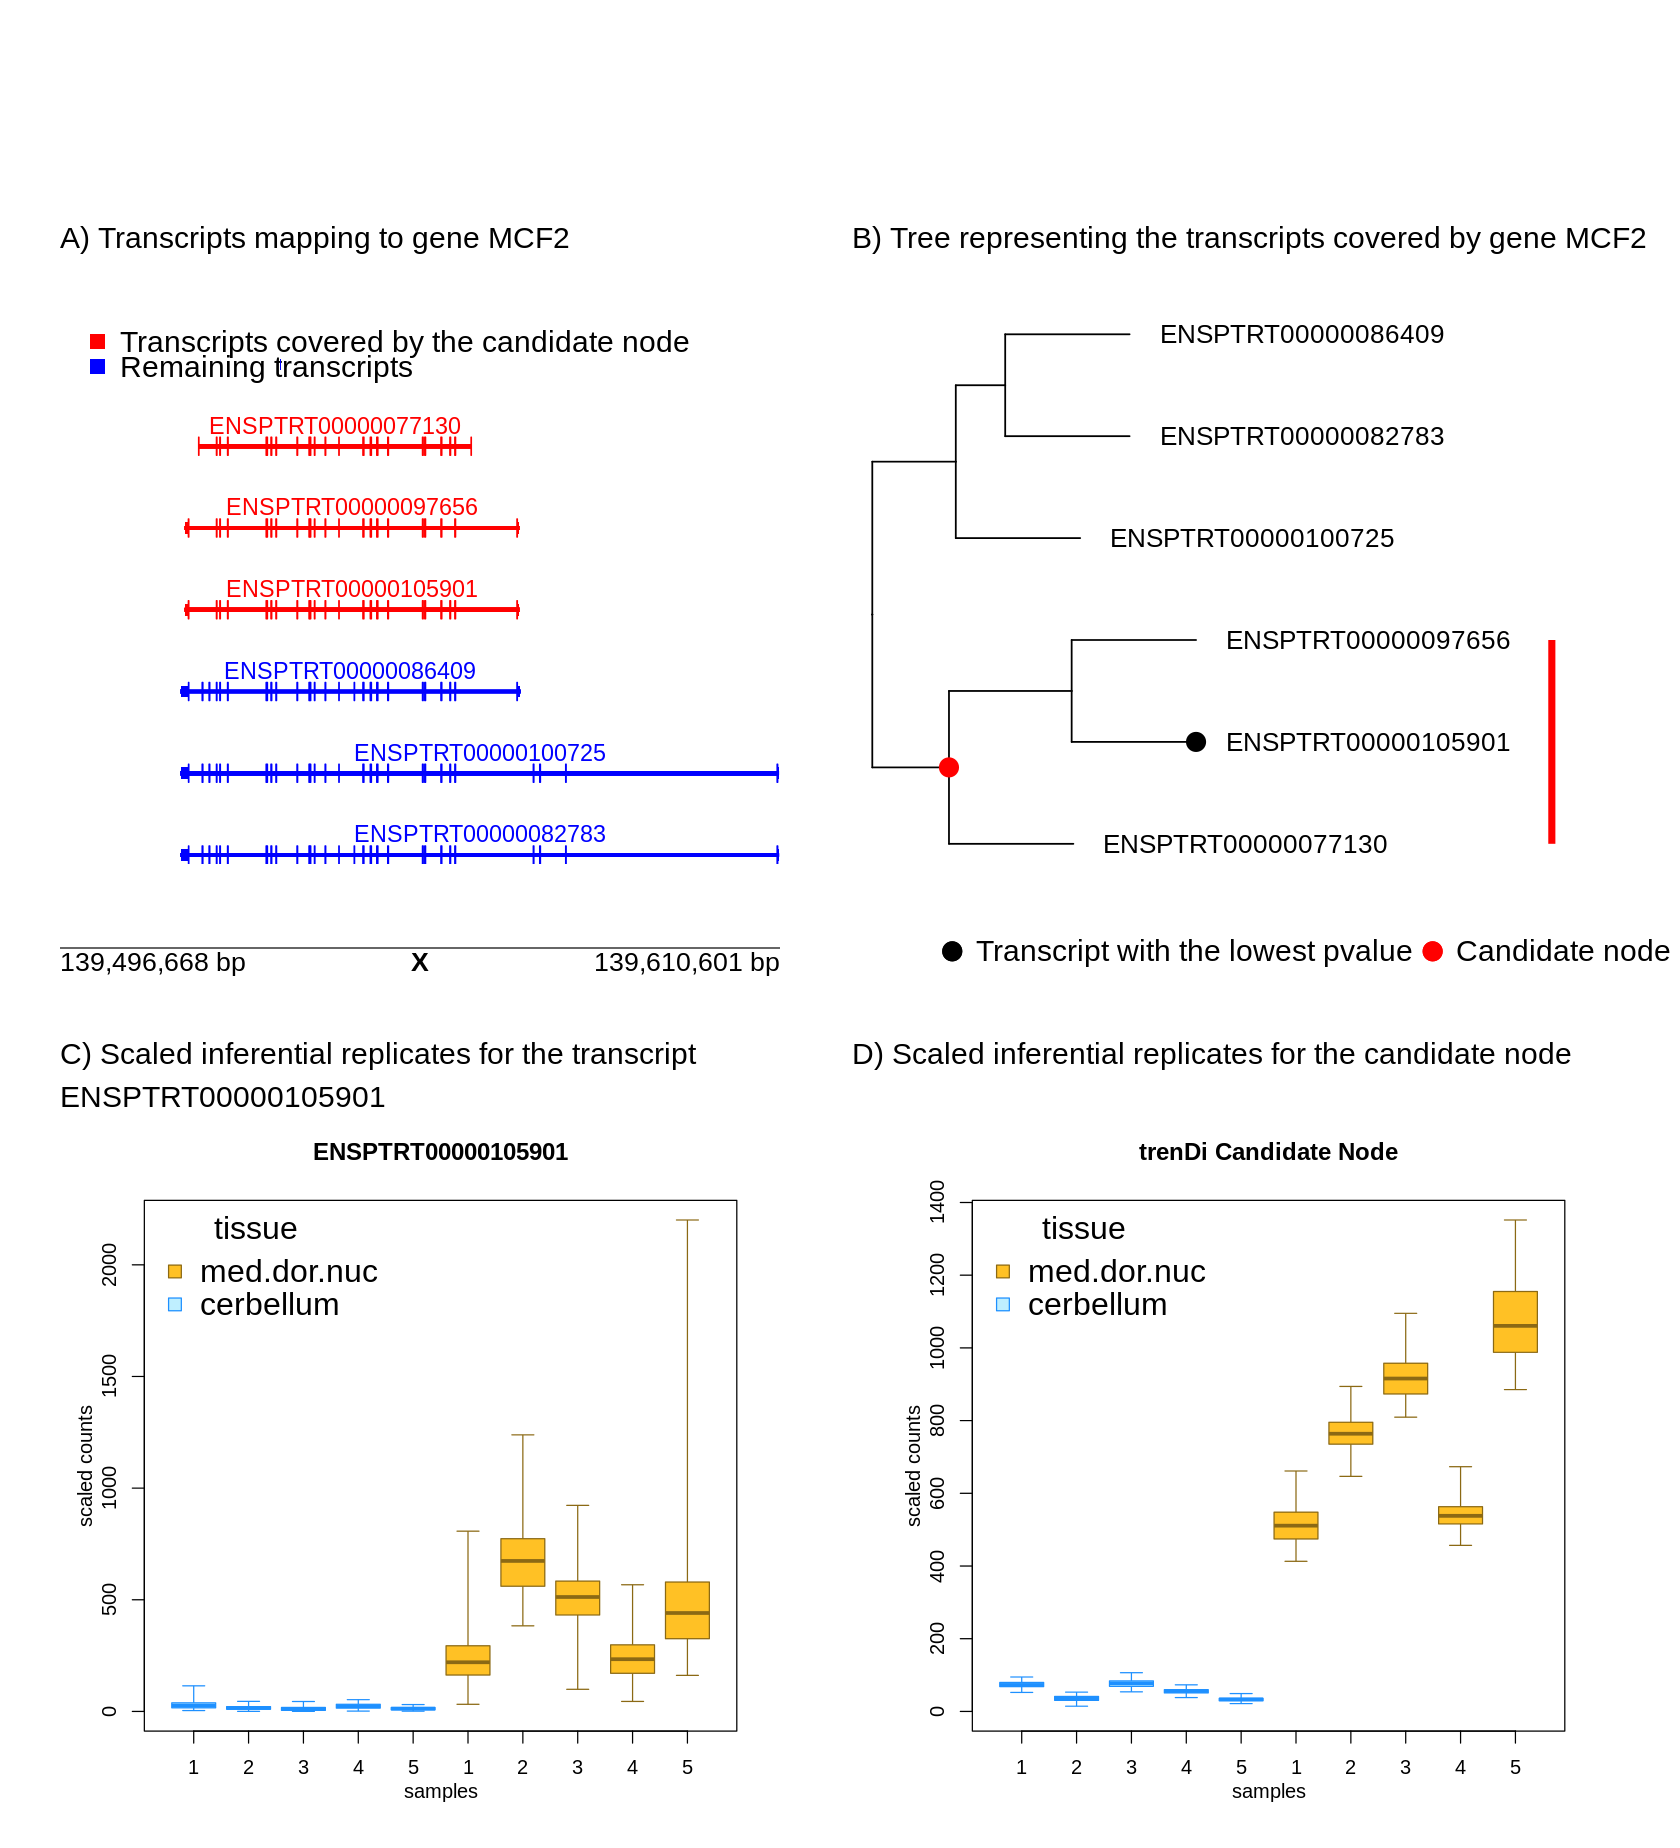

In [7]:
#387,360, 206, 6, 219, 152, 313, 195
i <- 1
j <- 386
tt <- extPreInf(tseChimp, y, treeDE, treeDECommonInds, txpChimp, genesChimp, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="left",x="tissue")
pTree <- plotTree(tt$tSub, 8, tt$minTInd, of=205, xlim=500)
pgs <- parF(tt$g, tt$txShow, tt$tSub, assemb=assemb)

options(repr.plot.width=14, repr.plot.height=15.4)
library(plotgardener)
pageCreate(width = 14, height = 12, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = 18
)#, fontface = "bold")

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the candidate node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 1, width = 1, height = 0.5,
    just = c("left", "top"), fontsize=18,
)
plotText(label="A) Transcripts mapping to gene MCF2", x = 0.5, y = 0.2,
        params = parText)

plotTranscripts(
    params = par, x = 1.5, y = 5.5, width = 5, height = 8.5, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)

plotGenomeLabel(
  params = par, x = 0.5, y = 6.2, length=6,
  just = c("left", "top"), fontsize=16
)

plotText(label="B) Tree representing the transcripts covered by gene MCF2", 
         x = 7.1, y = 0.2, params = parText)
plotGG(
    plot = pTree,
    x = 6.8, y =0.5, width = 8, height=6
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSPTRT00000105901", 
         x = 0.5, y = 7, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 7.6, width = 6, height=6
)

plotText(label="D) Scaled inferential replicates for the candidate node", 
         x = 7.1, y = 7, params = parText)

plotGG(
    plot = pI[[2]],
    x = 7.4, y = 7.6, width = 6, height=6
)

[1] "ENSPTRT00000100463" "ENSPTRT00000020240"
[1] "Genes ENSPTRG00000010925"
            tx_name1             tx_name2             tx_name3 
"ENSPTRT00000100463" "ENSPTRT00000020240" "ENSPTRT00000098461" 
[1] "ENSPTRT00000100463" "ENSPTRT00000020240" "ENSPTRT00000098461"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



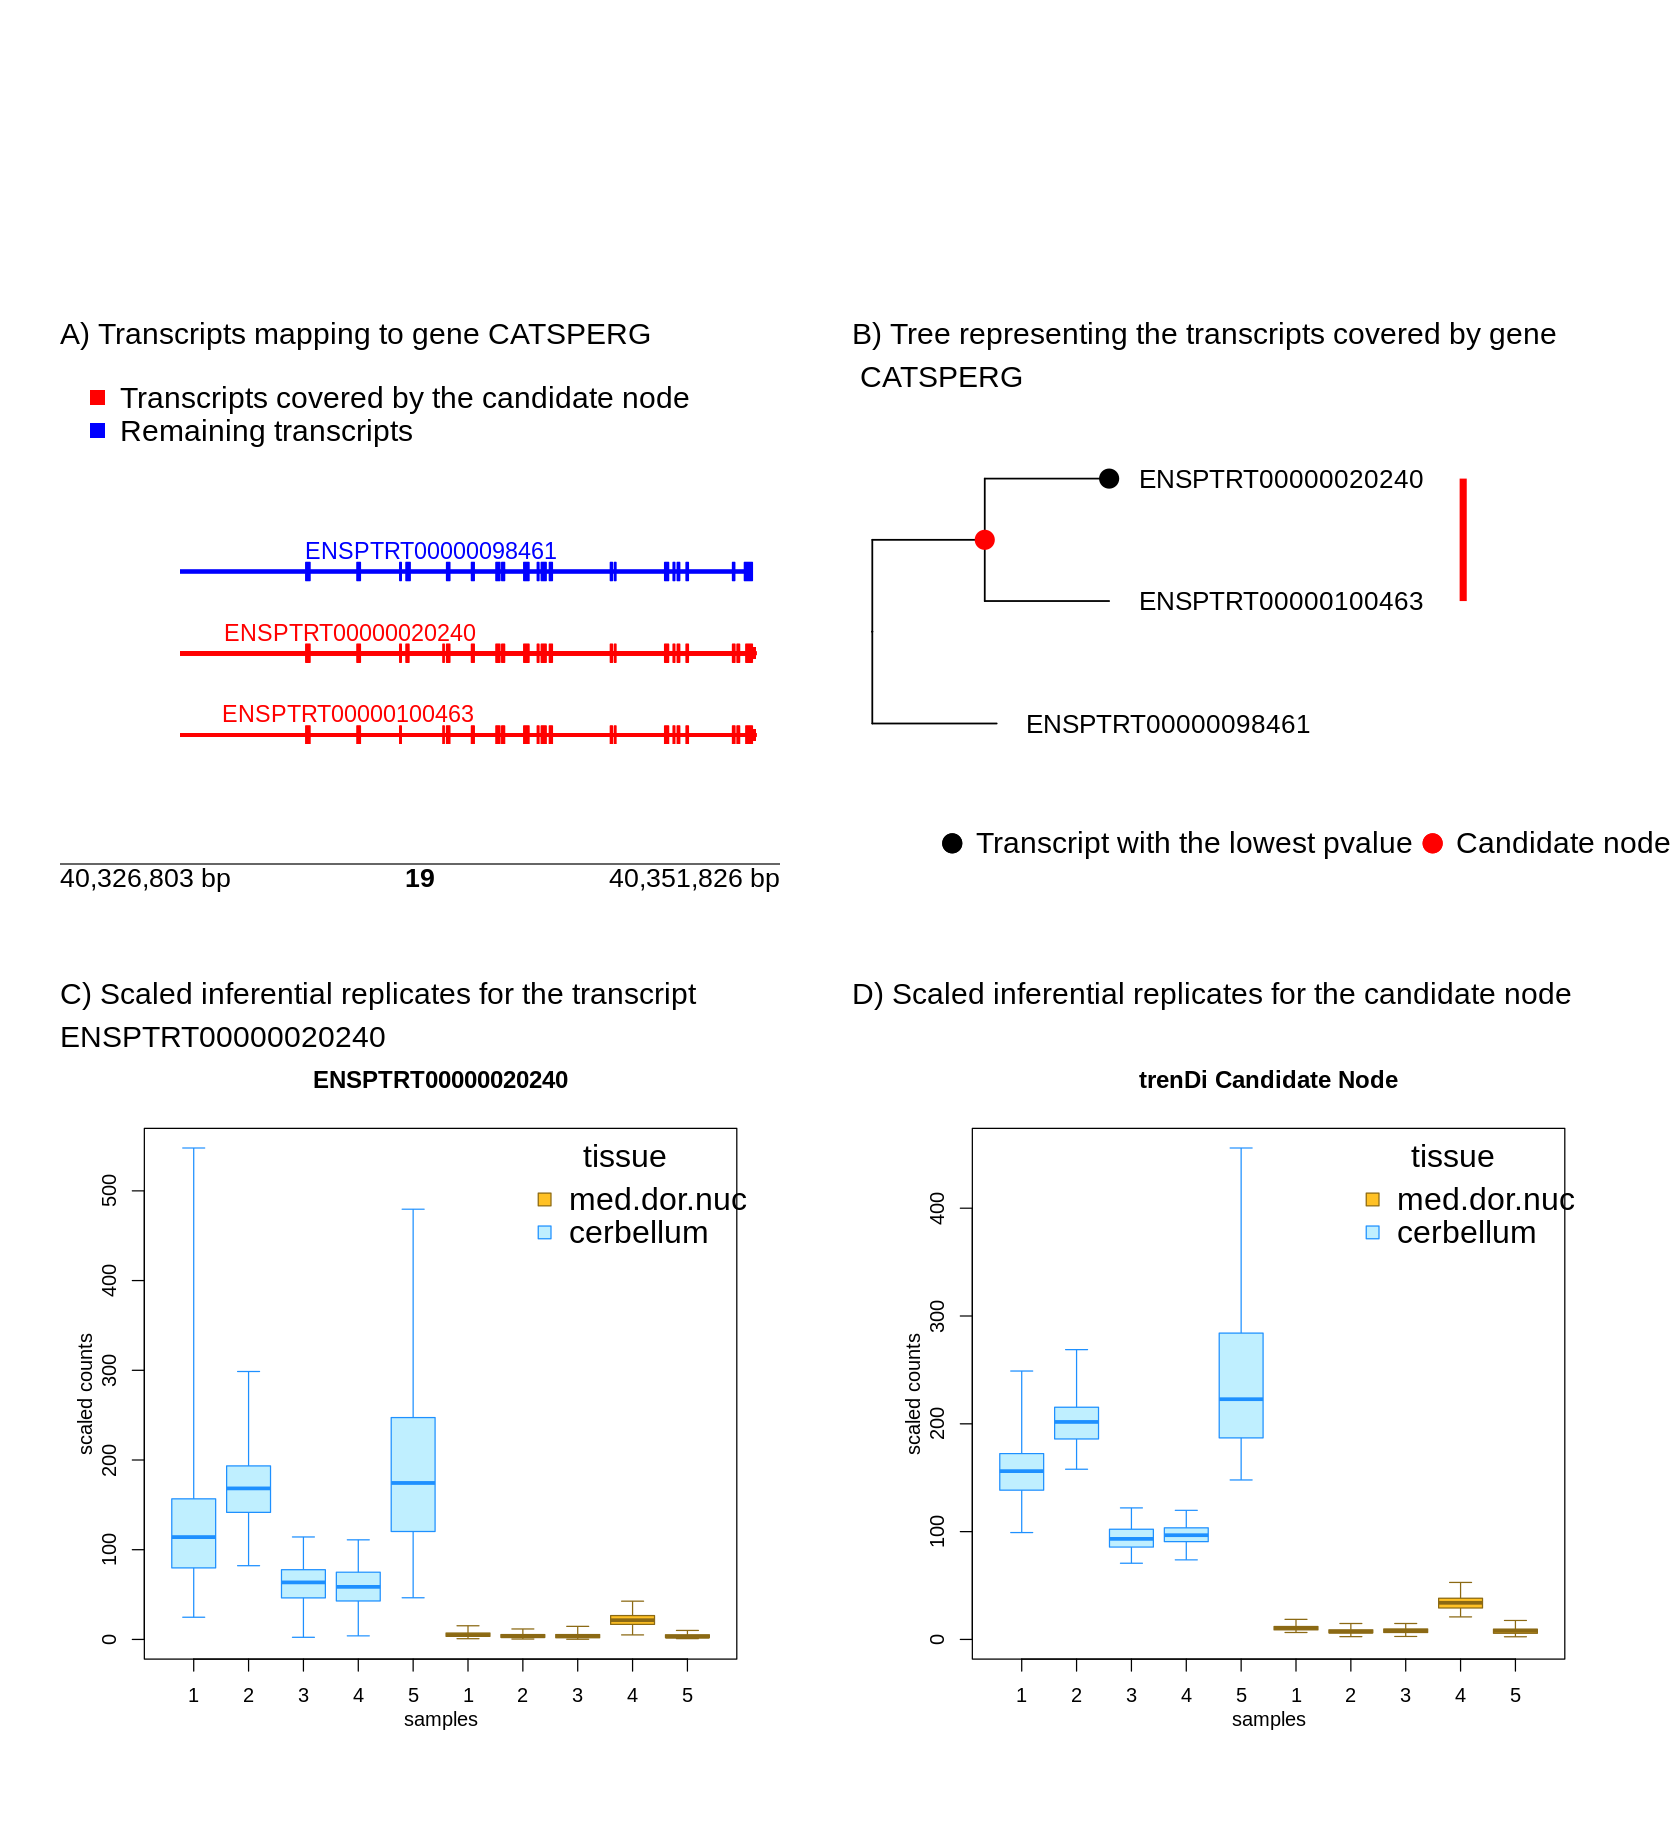

In [8]:
i <- 1
j <- 344
tt <- extPreInf(tseChimp, y, treeDE, treeDECommonInds, txpChimp, genesChimp, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="right",x="tissue")
pTree <- plotTree(tt$tSub, 5, tt$minTInd, of=205, xlim=500)
pgs <- parF(tt$g, tt$txShow, tt$tSub, assemb=assemb, chromSt = -10000, chromEnd = 1000)

library(plotgardener)
pageCreate(width = 14, height = 10, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = 18
)#, fontface = "bold")

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the candidate node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.4, width = 1, height = 0.7,
    just = c("left", "top"), fontsize=18,
)
plotText(label="A) Transcripts mapping to gene CATSPERG", x = 0.5, y = 0,
        params = parText)

plotTranscripts(
    params = par, x = 1.5, y = 3.5, width = 5, height = 6.5, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)

plotGenomeLabel(
  params = par, x = 0.5, y = 4.5, length=6,
  just = c("left", "top"), fontsize=16
)

plotText(label="B) Tree representing the transcripts covered by gene \n CATSPERG", 
         x = 7.1, y = 0, params = parText)
plotGG(
    plot = pTree,
    x = 6.8, y =0.6, width = 8, height=4
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSPTRT00000020240", 
         x = 0.5, y = 5.5, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 6, width = 6, height=6
)

plotText(label="D) Scaled inferential replicates for the candidate node", 
         x = 7.1, y = 5.5, params = parText)

plotGG(
    plot = pI[[2]],
    x = 7.4, y = 6, width = 6, height=6
)

[1] "ENSPTRT00000107110" "ENSPTRT00000013074"
[1] "Genes ENSPTRG00000007085"
            tx_name1             tx_name2             tx_name3 
"ENSPTRT00000013074" "ENSPTRT00000107110" "ENSPTRT00000096752" 
[1] "ENSPTRT00000107110" "ENSPTRT00000013074" "ENSPTRT00000096752"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



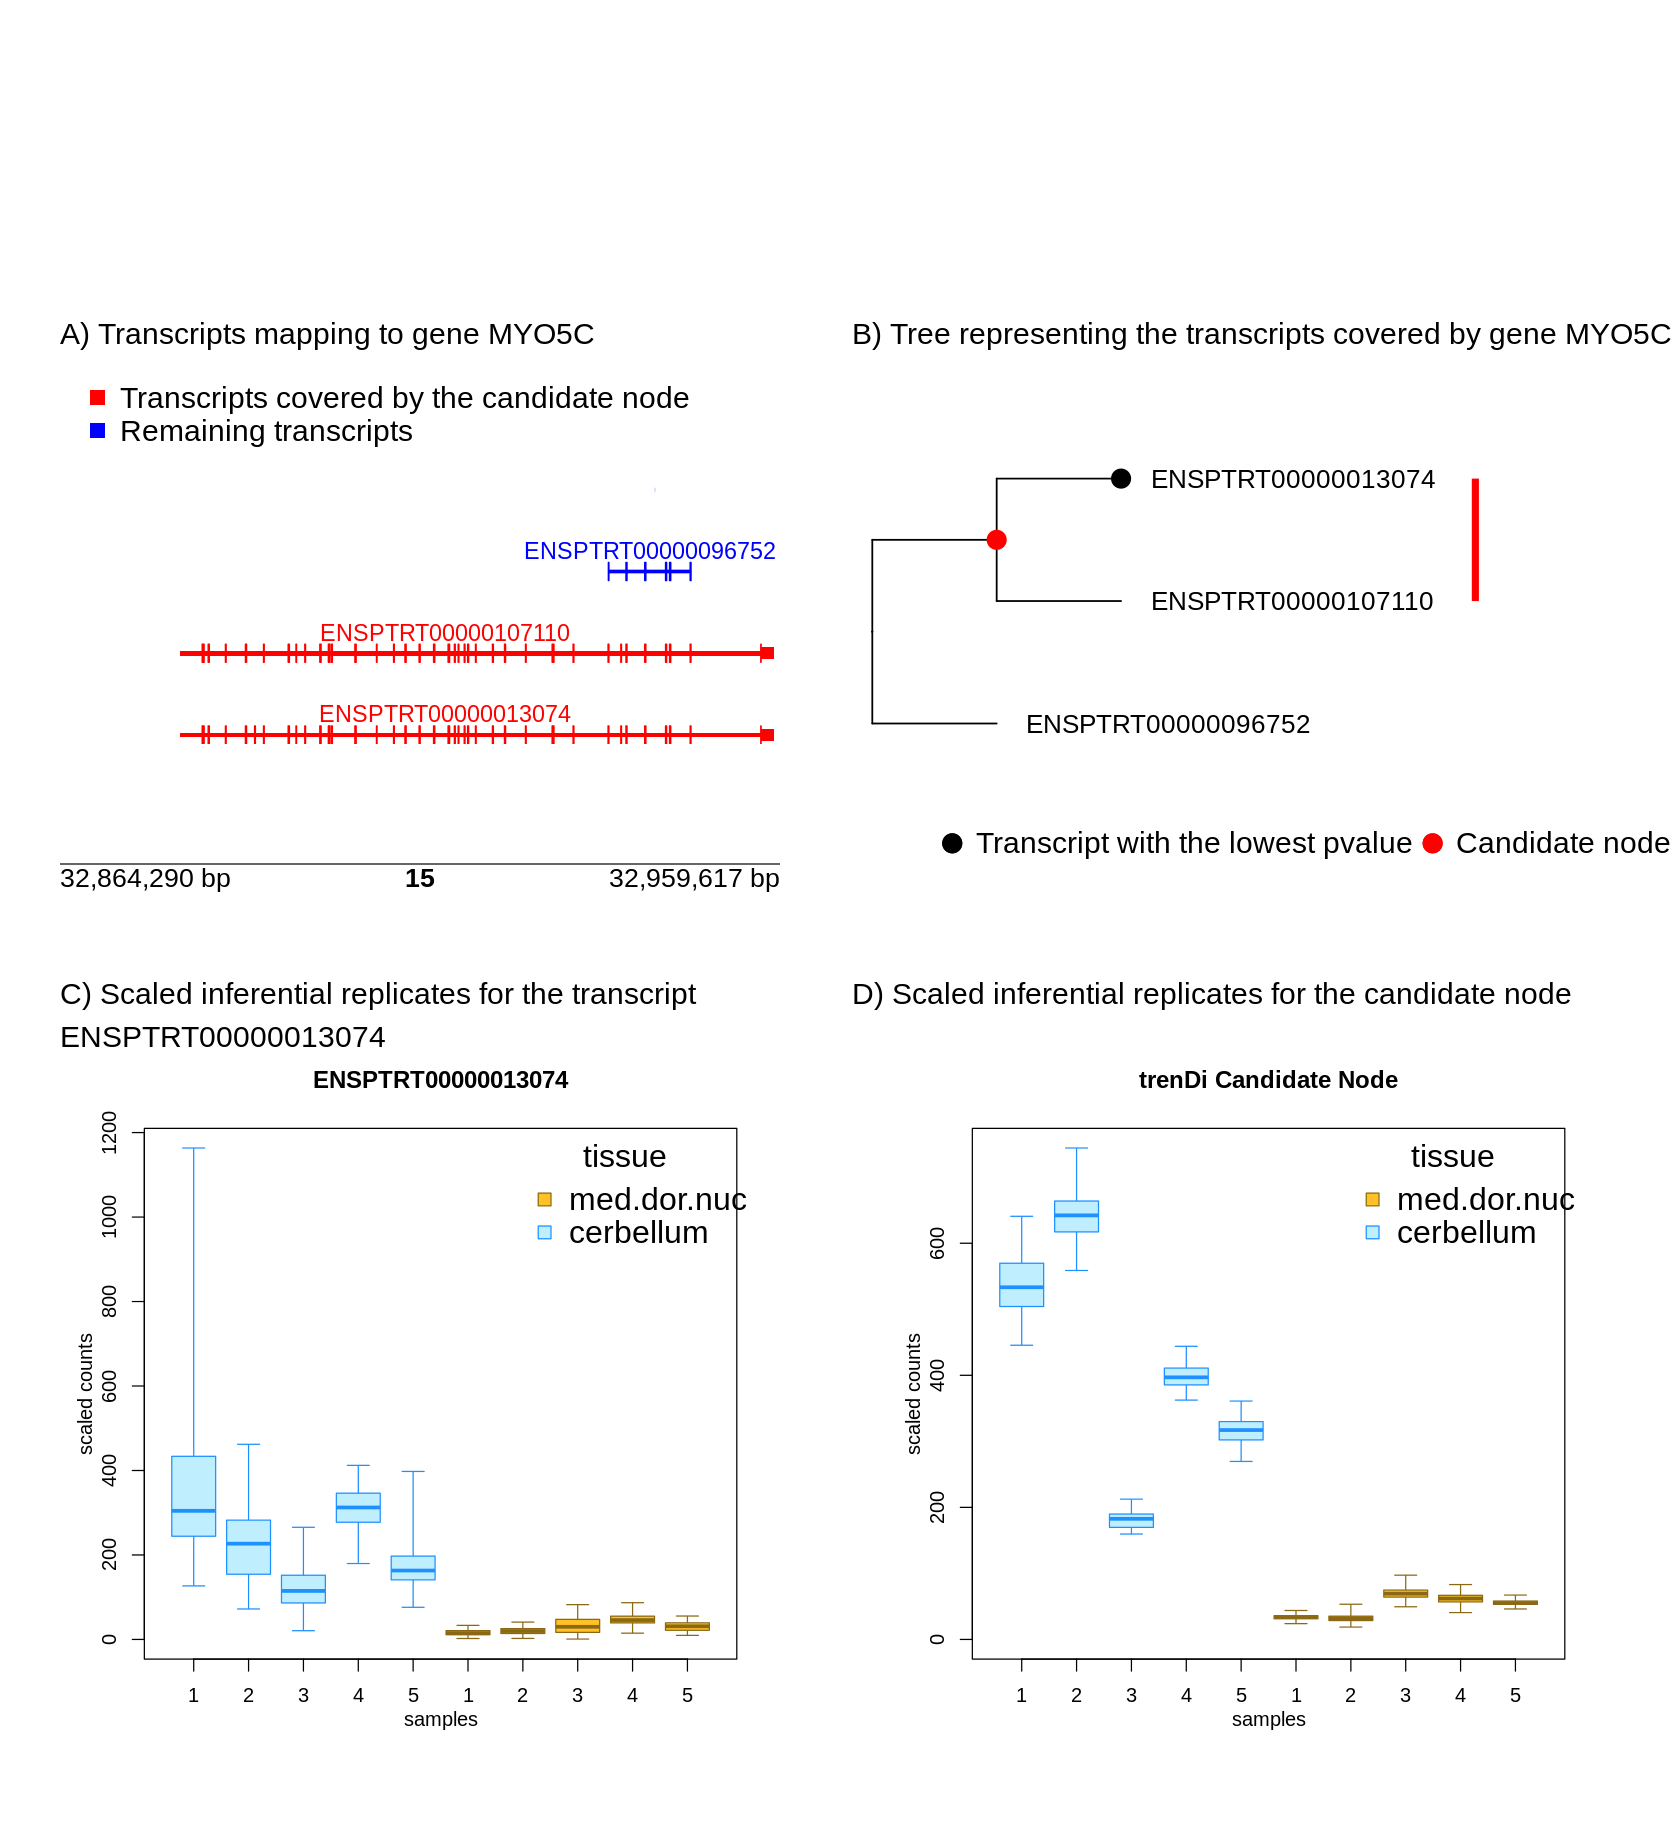

In [9]:
i <- 1
j <- 367
tt <- extPreInf(tseChimp, y, treeDE, treeDECommonInds, txpChimp, genesChimp, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="right",x="tissue")
pTree <- plotTree(tt$tSub, 5, tt$minTInd, of=205, xlim=500)
pgs <- parF(tt$g, tt$txShow, tt$tSub, assemb=assemb, chromSt = -10000, chromEnd = 1000)

library(plotgardener)
pageCreate(width = 14, height = 10, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = 18
)#, fontface = "bold")

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the candidate node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.4, width = 1, height = 0.7,
    just = c("left", "top"), fontsize=18,
)
plotText(label="A) Transcripts mapping to gene MYO5C", x = 0.5, y = 0,
        params = parText)

plotTranscripts(
    params = par, x = 1.5, y = 3.5, width = 5, height = 6.5, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)

plotGenomeLabel(
  params = par, x = 0.5, y = 4.5, length=6,
  just = c("left", "top"), fontsize=16
)

plotText(label="B) Tree representing the transcripts covered by gene MYO5C", 
         x = 7.1, y = 0, params = parText)
plotGG(
    plot = pTree,
    x = 6.8, y =0.6, width = 8, height=4
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSPTRT00000013074", 
         x = 0.5, y = 5.5, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 6, width = 6, height=6
)

plotText(label="D) Scaled inferential replicates for the candidate node", 
         x = 7.1, y = 5.5, params = parText)

plotGG(
    plot = pI[[2]],
    x = 7.4, y = 6, width = 6, height=6
)

[1] "ENSPTRT00000104666" "ENSPTRT00000034383"
[1] "Genes ENSPTRG00000018619"
            tx_name1             tx_name2             tx_name3 
"ENSPTRT00000101457" "ENSPTRT00000079092" "ENSPTRT00000082797" 
            tx_name4             tx_name5 
"ENSPTRT00000034383" "ENSPTRT00000104666" 
[1] "ENSPTRT00000104666" "ENSPTRT00000034383" "ENSPTRT00000101457"
[4] "ENSPTRT00000082797" "ENSPTRT00000079092"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

text[text2]

text[text2]

text[text2]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



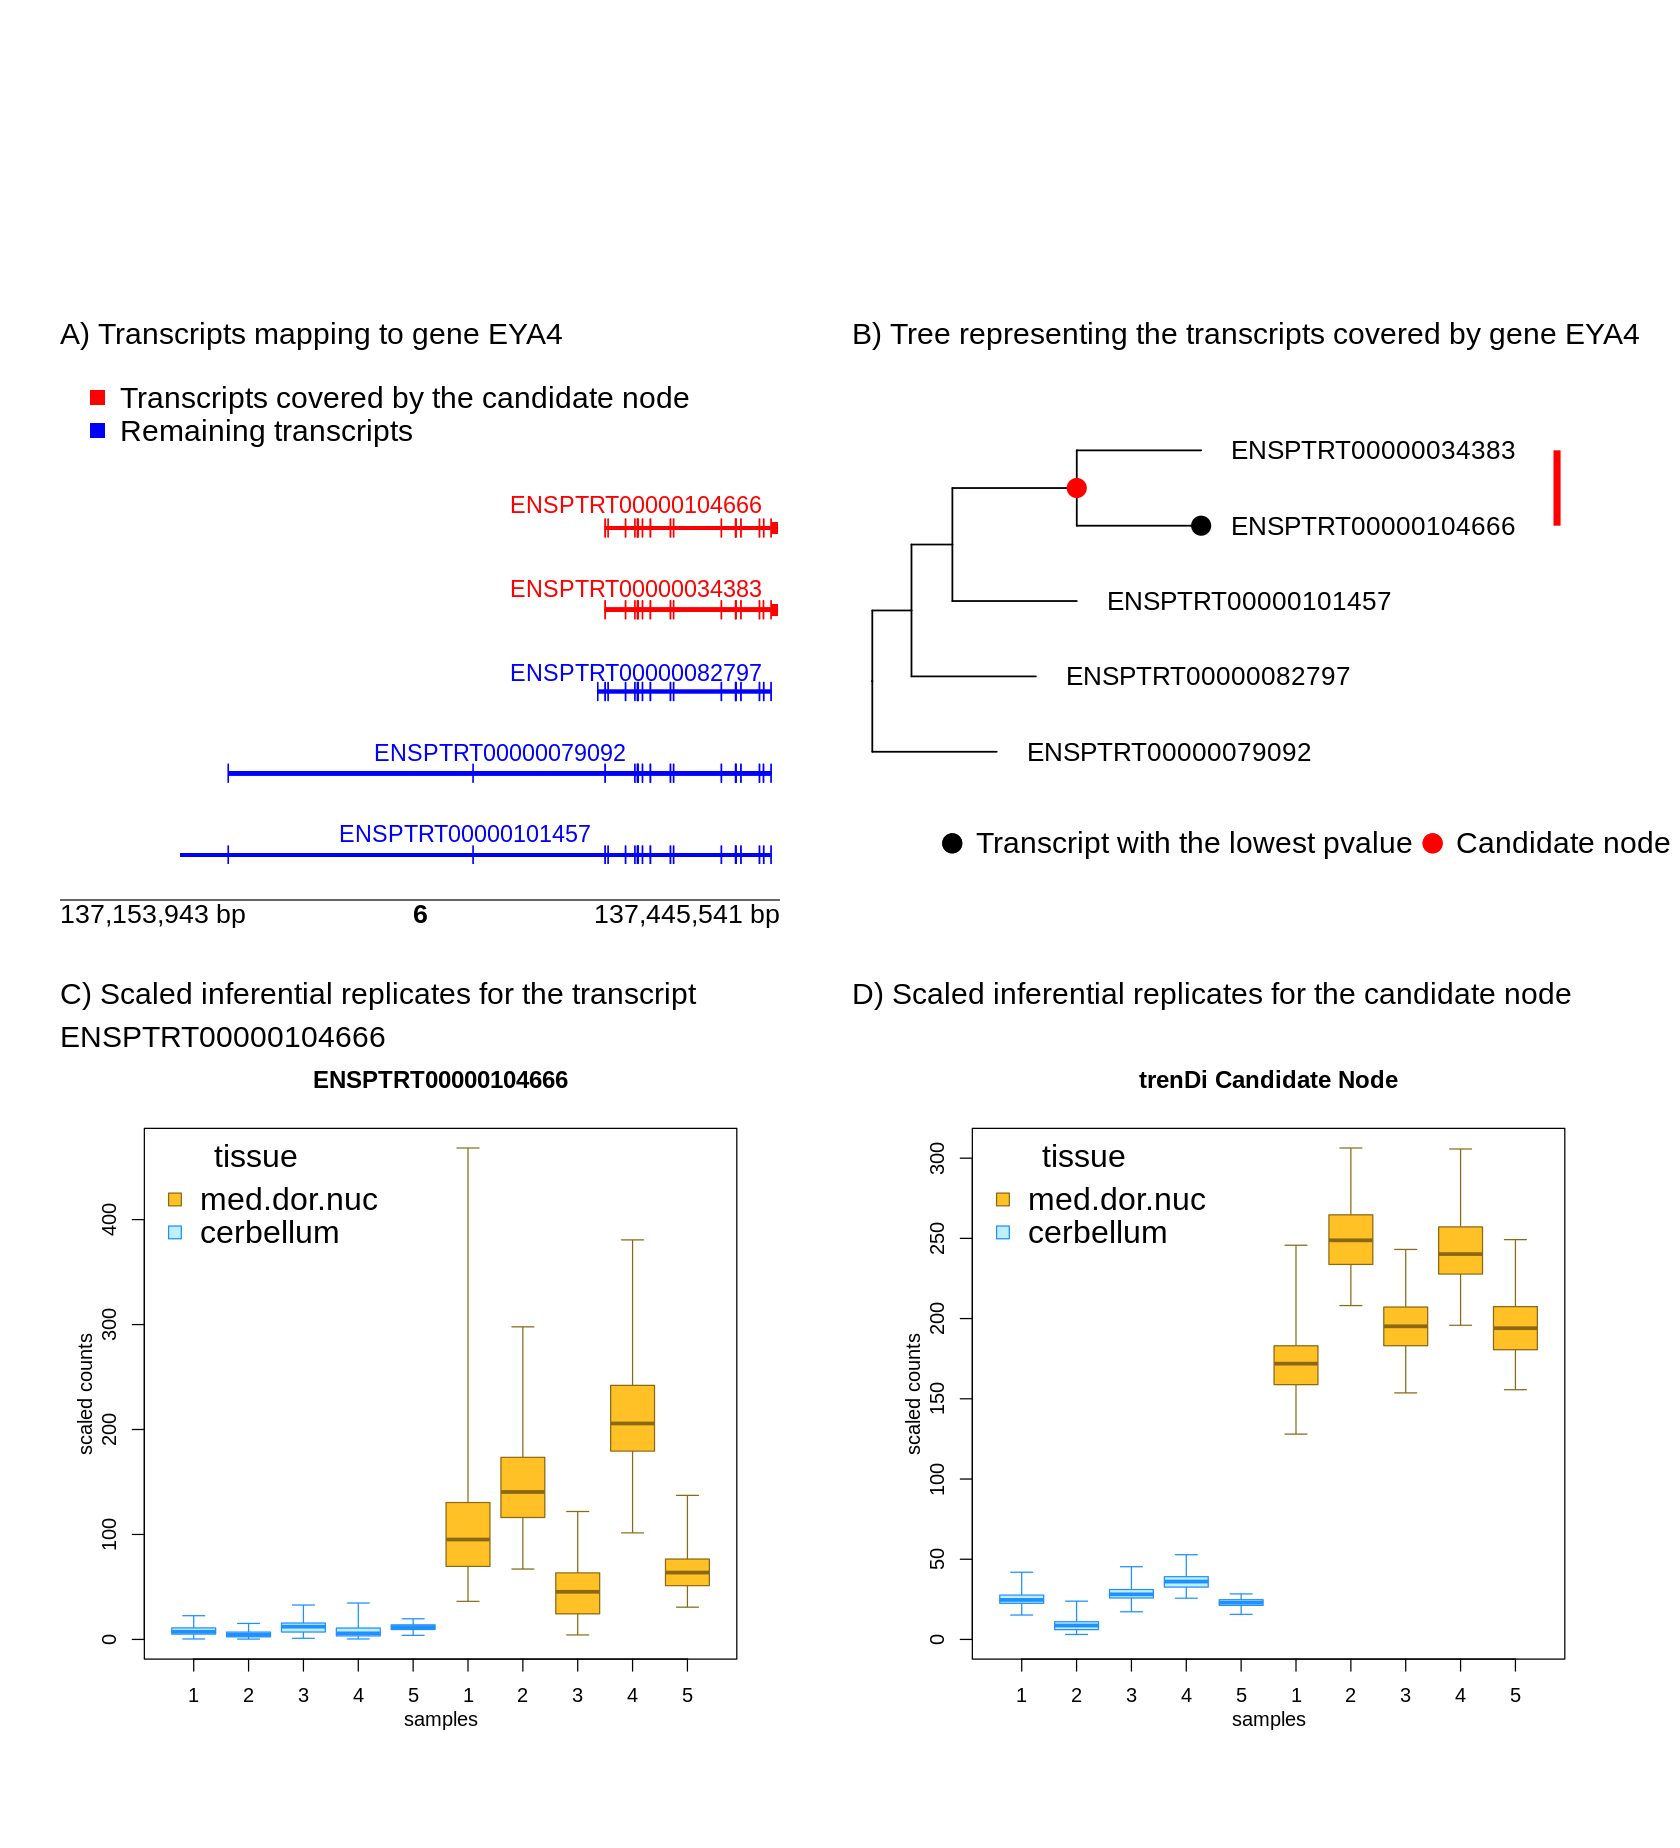

In [10]:
i <- 1
j <- 269
tt <- extPreInf(tseChimp, y, treeDE, treeDECommonInds, txpChimp, genesChimp, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="left",x="tissue")
pTree <- plotTree(tt$tSub, 9, tt$minTInd, of=205, xlim=500)
pgs <- parF(tt$g, tt$txShow, tt$tSub, assemb=assemb, chromSt = -10000, chromEnd = 1000)

library(plotgardener)
pageCreate(width = 14, height = 10, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = 18
)#, fontface = "bold")

parTxpR  <- pgParams(
    fontsize = 14,
    fontcolor="red"
)
parTxpB  <- pgParams(
    fontsize = 14,
    fontcolor="blue"
)

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the candidate node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.4, width = 1, height = 0.7,
    just = c("left", "top"), fontsize=18,
)
plotText(label="A) Transcripts mapping to gene EYA4", x = 0.5, y = 0,
        params = parText)

plotTranscripts(
    params = par, x = 1.5, y = 4.5, width = 5, height = 8, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)
plotText(label="ENSPTRT00000104666", x = 5.3, y = 1.5,
        params = parTxpR)
plotText(label="ENSPTRT00000034383", x = 5.3, y = 2.2,
        params = parTxpR)
plotText(label="ENSPTRT00000082797", x = 5.3, y = 2.9,
        params = parTxpB)

plotGenomeLabel(
  params = par, x = 0.5, y = 4.8, length=6,
  just = c("left", "top"), fontsize=16
)

plotText(label="B) Tree representing the transcripts covered by gene EYA4", 
         x = 7.1, y = 0, params = parText)
plotGG(
    plot = pTree,
    x = 6.8, y =0.6, width = 8, height=4
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSPTRT00000104666", 
         x = 0.5, y = 5.5, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 6, width = 6, height=6
)

plotText(label="D) Scaled inferential replicates for the candidate node", 
         x = 7.1, y = 5.5, params = parText)

plotGG(
    plot = pI[[2]],
    x = 7.4, y = 6, width = 6, height=6
)

[1] "ENSPTRT00000110284" "ENSPTRT00000043834" "ENSPTRT00000100696"
[1] "Genes ENSPTRG00000008779"
            tx_name1             tx_name2             tx_name3 
"ENSPTRT00000106916" "ENSPTRT00000110284" "ENSPTRT00000043834" 
            tx_name4 
"ENSPTRT00000100696" 
[1] "ENSPTRT00000110284" "ENSPTRT00000043834" "ENSPTRT00000100696"
[4] "ENSPTRT00000106916"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

text[text2]

transcripts[transcripts1]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



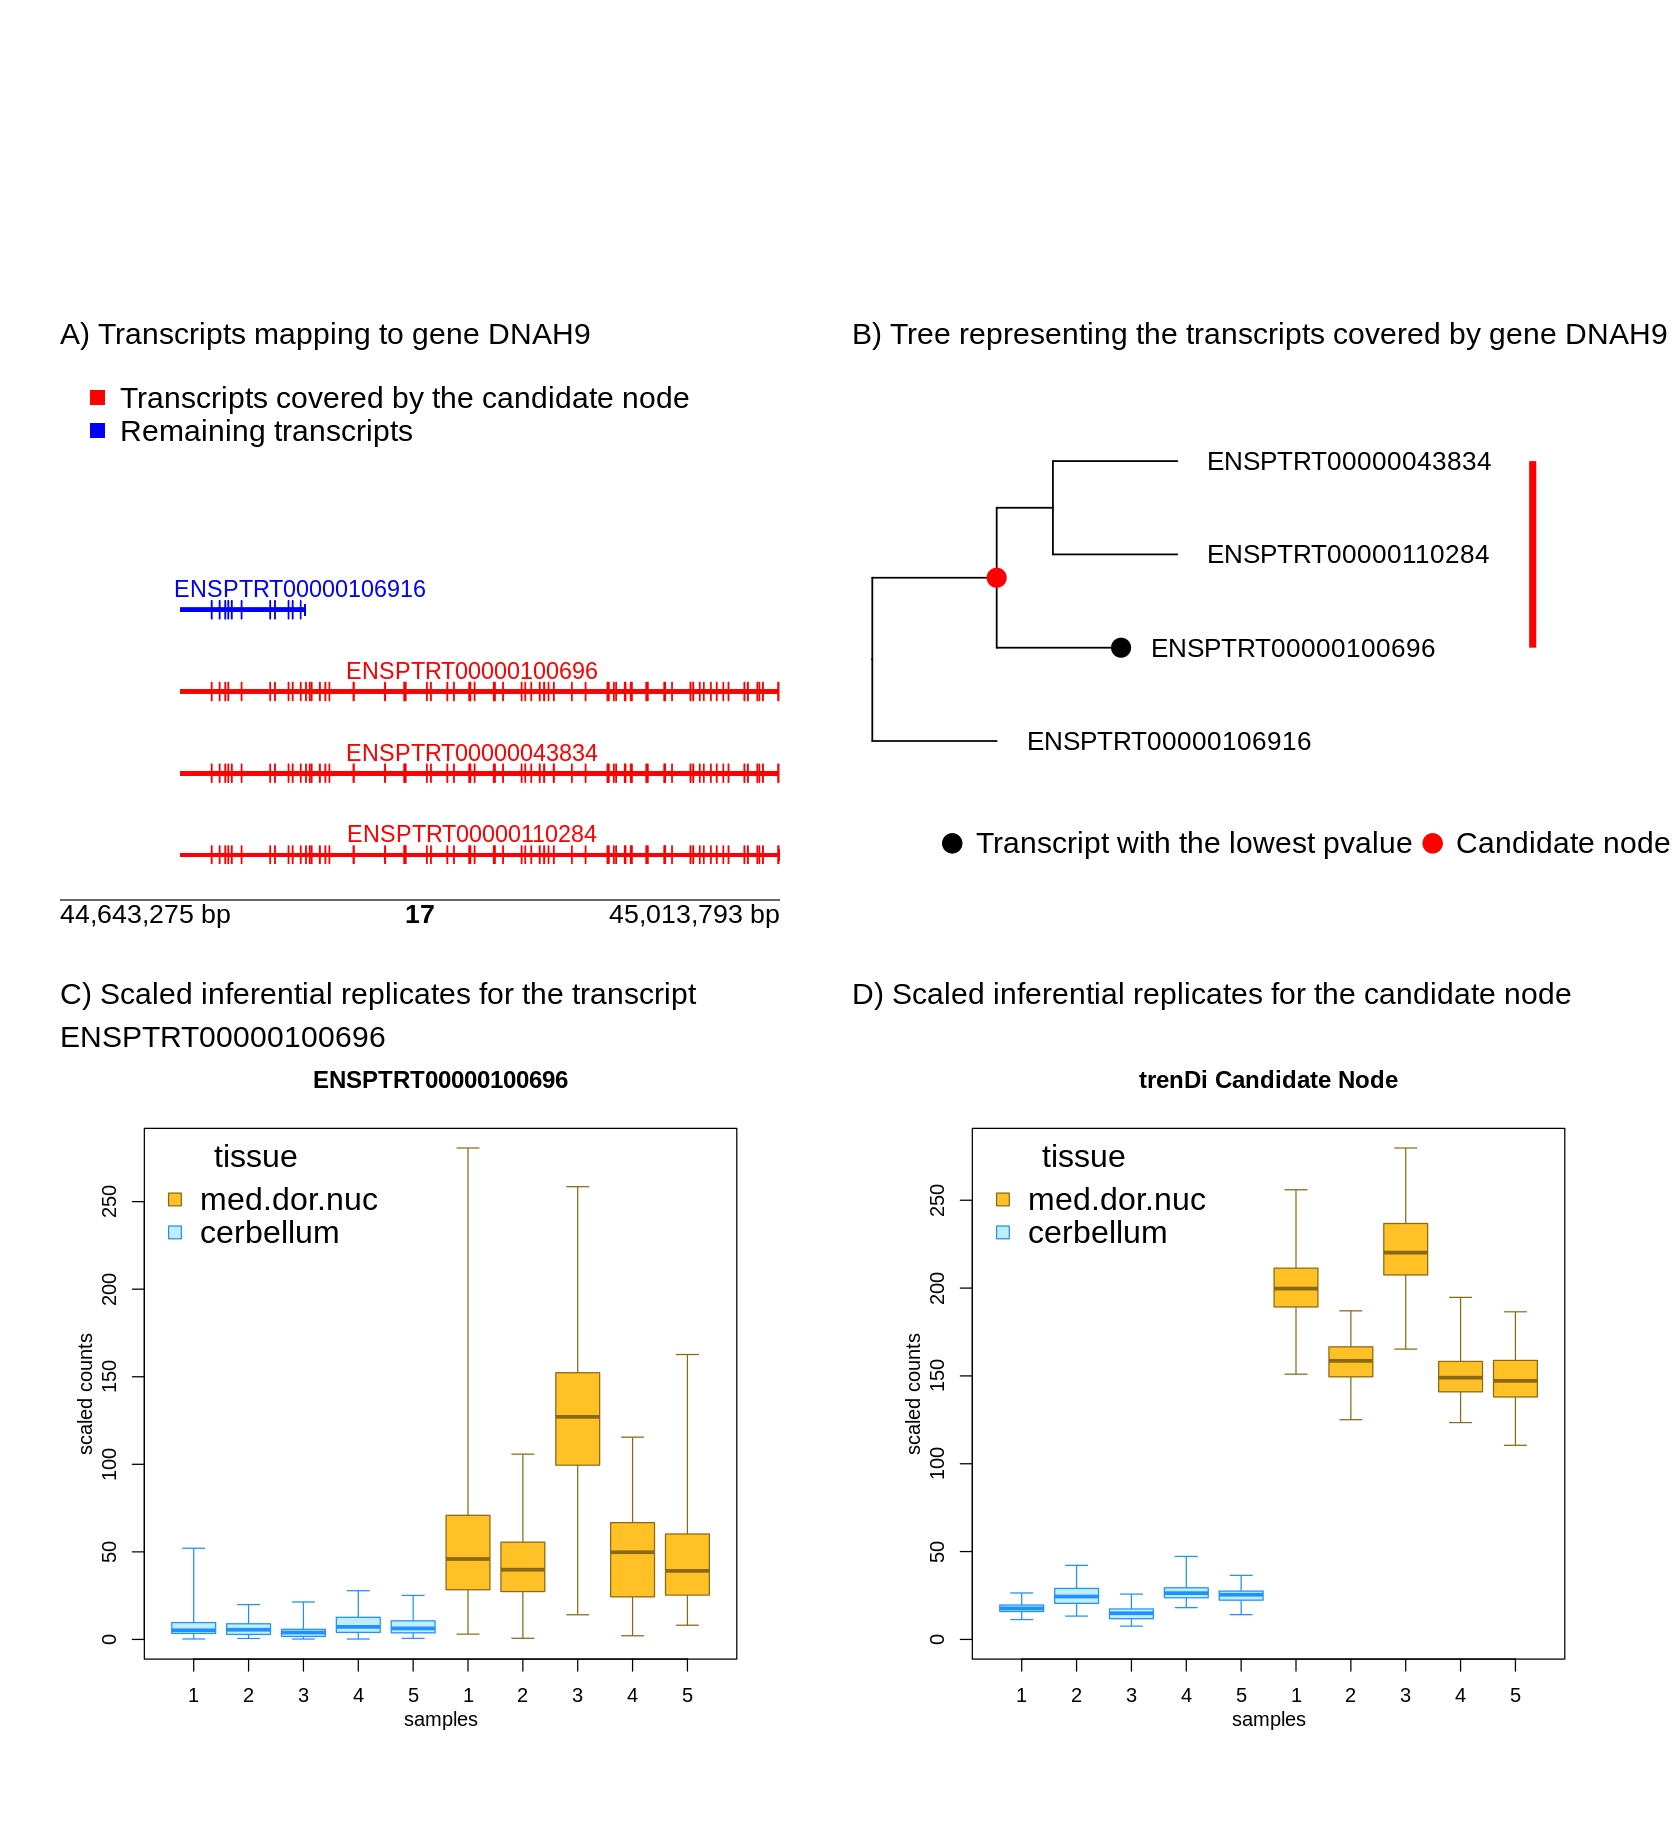

In [11]:
i <- 1
j <- 252
tt <- extPreInf(tseChimp, y, treeDE, treeDECommonInds, txpChimp, genesChimp, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="left",x="tissue")
pTree <- plotTree(tt$tSub, 6, tt$minTInd, of=205, xlim=500)
pgs <- parF(tt$g, tt$txShow, tt$tSub, assemb=assemb, chromSt = -10000, chromEnd = 10)

library(plotgardener)
pageCreate(width = 14, height = 10, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parTxpB  <- pgParams(
    fontsize = 14,
    fontcolor="blue"
)
parText <- pgParams(
    just = c("left", "top"), fontsize = 18
)#, fontface = "bold")

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the candidate node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.4, width = 1, height = 0.7,
    just = c("left", "top"), fontsize=18,
)
plotText(label="A) Transcripts mapping to gene DNAH9", x = 0.5, y = 0,
        params = parText)
plotText(label="ENSPTRT00000106916", x = 2.5, y = 2.2,
        params = parTxpB)


plotTranscripts(
    params = par, x = 1.5, y = 4.5, width = 5, height = 6.5, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)

plotGenomeLabel(
  params = par, x = 0.5, y = 4.8, length=6,
  just = c("left", "top"), fontsize=16
)

plotText(label="B) Tree representing the transcripts covered by gene DNAH9", 
         x = 7.1, y = 0, params = parText)
plotGG(
    plot = pTree,
    x = 6.8, y =0.6, width = 8, height=4
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSPTRT00000100696", 
         x = 0.5, y = 5.5, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 6, width = 6, height=6
)

plotText(label="D) Scaled inferential replicates for the candidate node", 
         x = 7.1, y = 5.5, params = parText)

plotGG(
    plot = pI[[2]],
    x = 7.4, y = 6, width = 6, height=6
)

[1] "ENSPTRT00000097751" "ENSPTRT00000037658"
[1] "Genes ENSPTRG00000020337"
            tx_name1             tx_name2             tx_name3 
"ENSPTRT00000097751" "ENSPTRT00000083071" "ENSPTRT00000037658" 
[1] "ENSPTRT00000097751" "ENSPTRT00000037658" "ENSPTRT00000083071"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



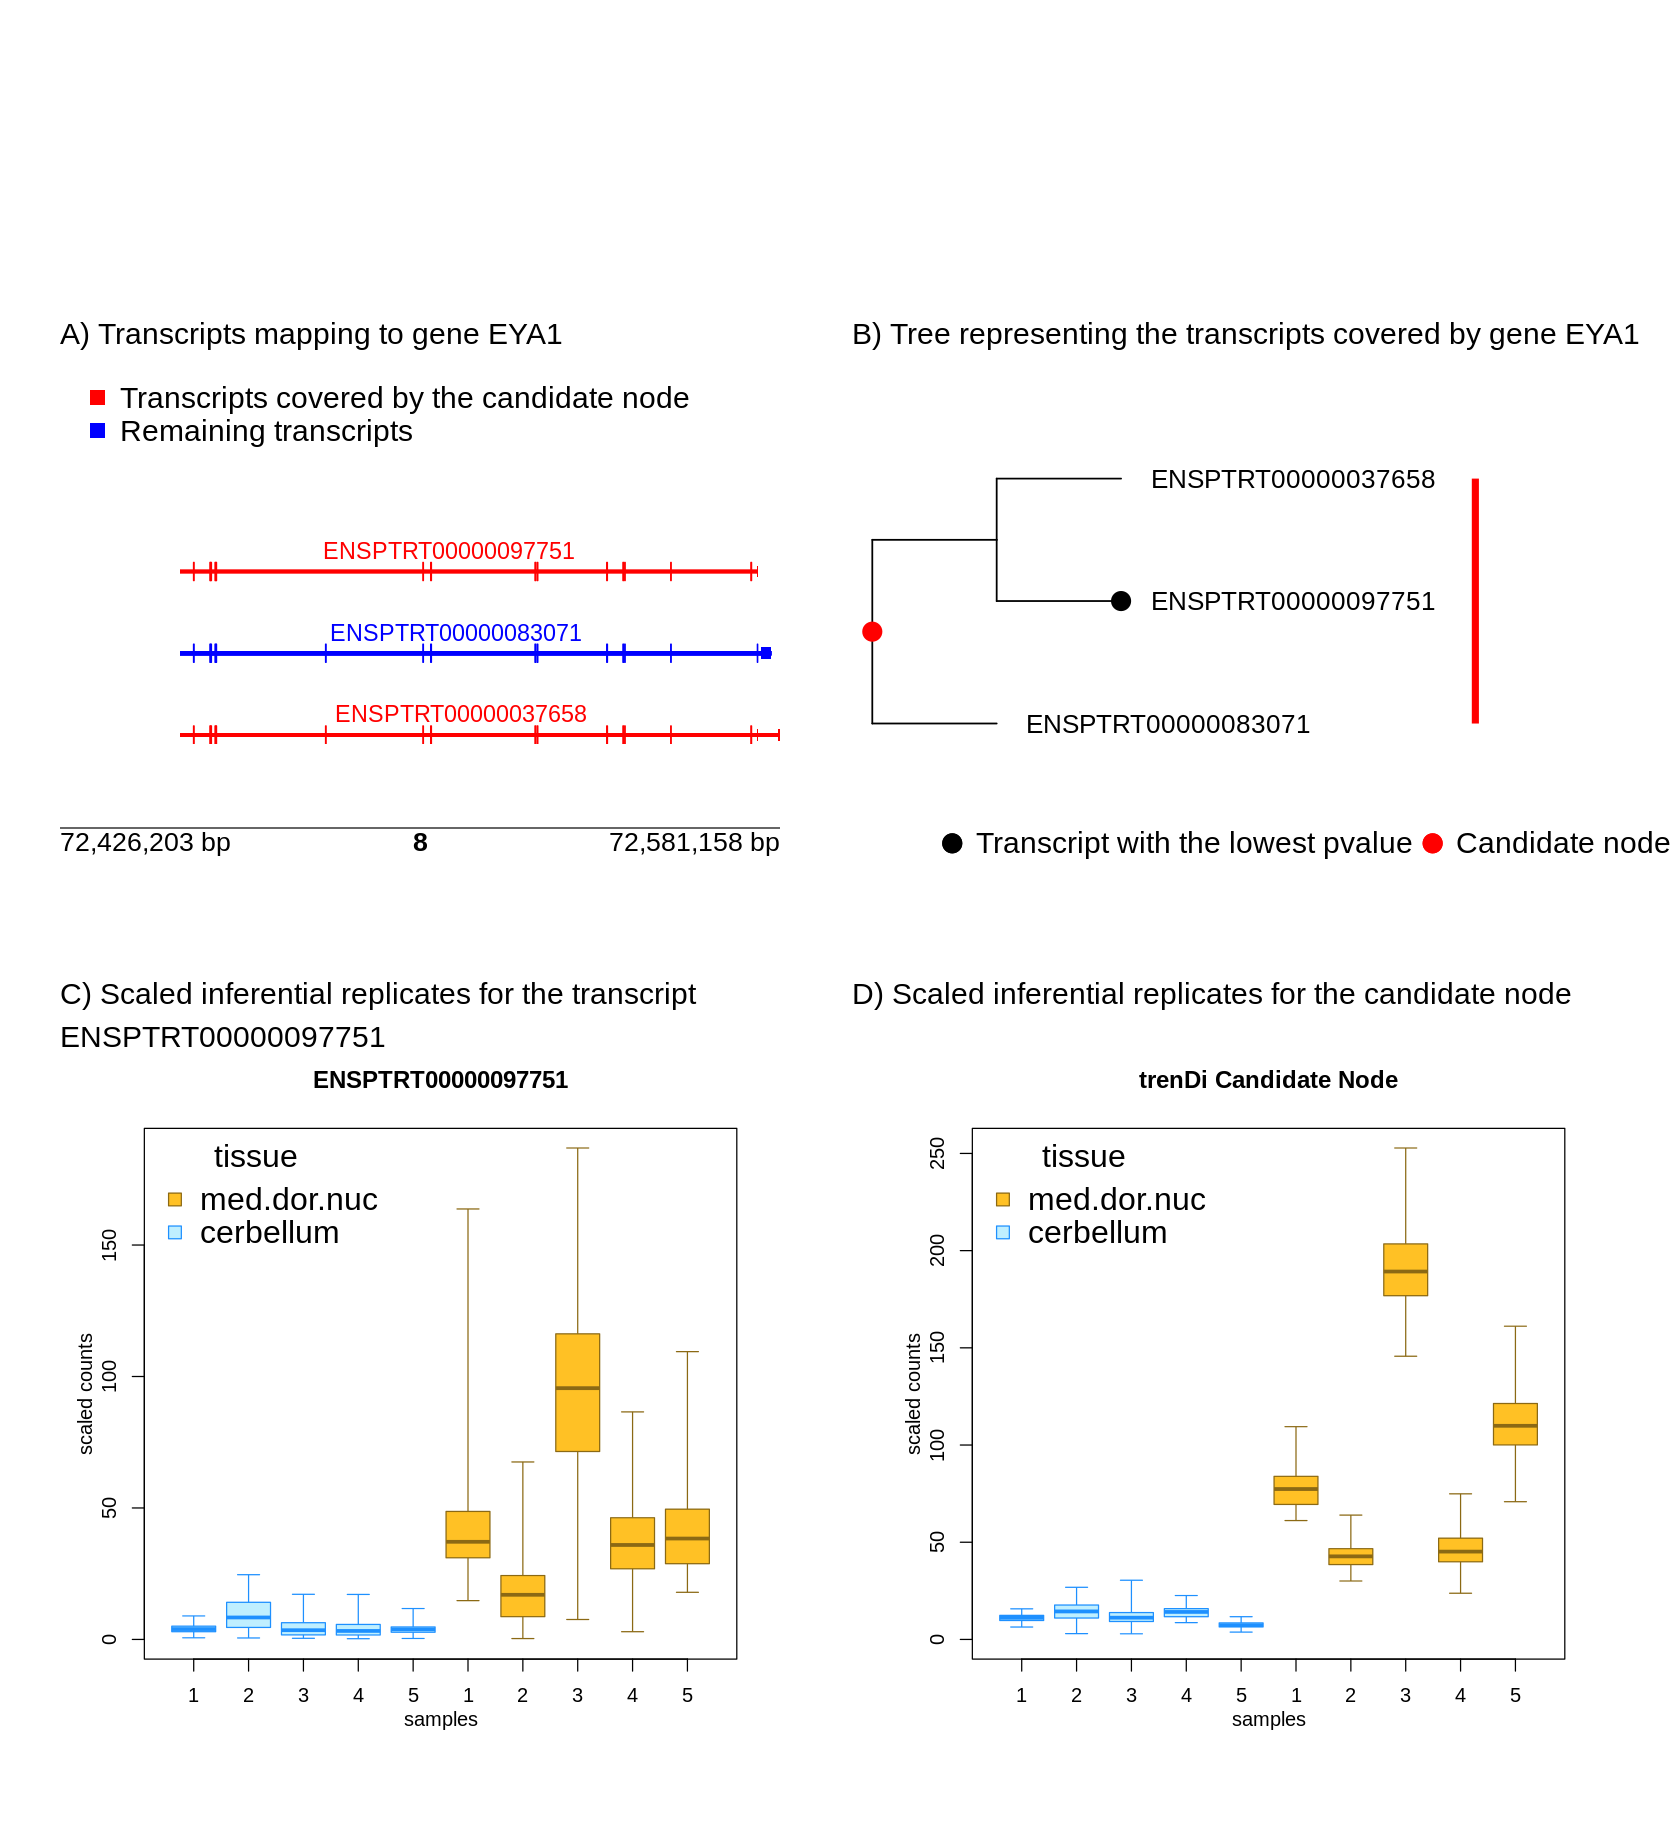

In [12]:
i <- 1
j <- 70

tt <- extPreInf(tseChimp, y, treeDE, treeDECommonInds, txpChimp, genesChimp, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="left",x="tissue")
pTree <- plotTree(tt$tSub, 4, tt$minTInd, of=205, xlim=500)
pgs <- parF(tt$g, tt$txShow, tt$tSub, assemb=assemb, chromSt = -10000, chromEnd = 10)

library(plotgardener)
pageCreate(width = 14, height = 10, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = 18
)#, fontface = "bold")



hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the candidate node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.4, width = 1, height = 0.7,
    just = c("left", "top"), fontsize=18,
)
plotText(label="A) Transcripts mapping to gene EYA1", x = 0.5, y = 0,
        params = parText)

plotTranscripts(
    params = par, x = 1.5, y = 3.5, width = 5, height = 6.5, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)

plotGenomeLabel(
  params = par, x = 0.5, y = 4.2, length=6,
  just = c("left", "top"), fontsize=16
)

plotText(label="B) Tree representing the transcripts covered by gene EYA1", 
         x = 7.1, y = 0, params = parText)
plotGG(
    plot = pTree,
    x = 6.8, y =0.6, width = 8, height=4
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSPTRT00000097751", 
         x = 0.5, y = 5.5, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 6, width = 6, height=6
)

plotText(label="D) Scaled inferential replicates for the candidate node", 
         x = 7.1, y = 5.5, params = parText)

plotGG(
    plot = pI[[2]],
    x = 7.4, y = 6, width = 6, height=6
)

[1] "ENSPTRT00000094046" "ENSPTRT00000076996" "ENSPTRT00000018121"
[4] "ENSPTRT00000100719"
[1] "Genes ENSPTRG00000009868"
            tx_name1             tx_name2             tx_name3 
"ENSPTRT00000094046" "ENSPTRT00000076996" "ENSPTRT00000076649" 
            tx_name4             tx_name5             tx_name6 
"ENSPTRT00000018121" "ENSPTRT00000111345" "ENSPTRT00000100719" 
[1] "ENSPTRT00000094046" "ENSPTRT00000076996" "ENSPTRT00000018121"
[4] "ENSPTRT00000100719" "ENSPTRT00000076649" "ENSPTRT00000111345"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

text[text2]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



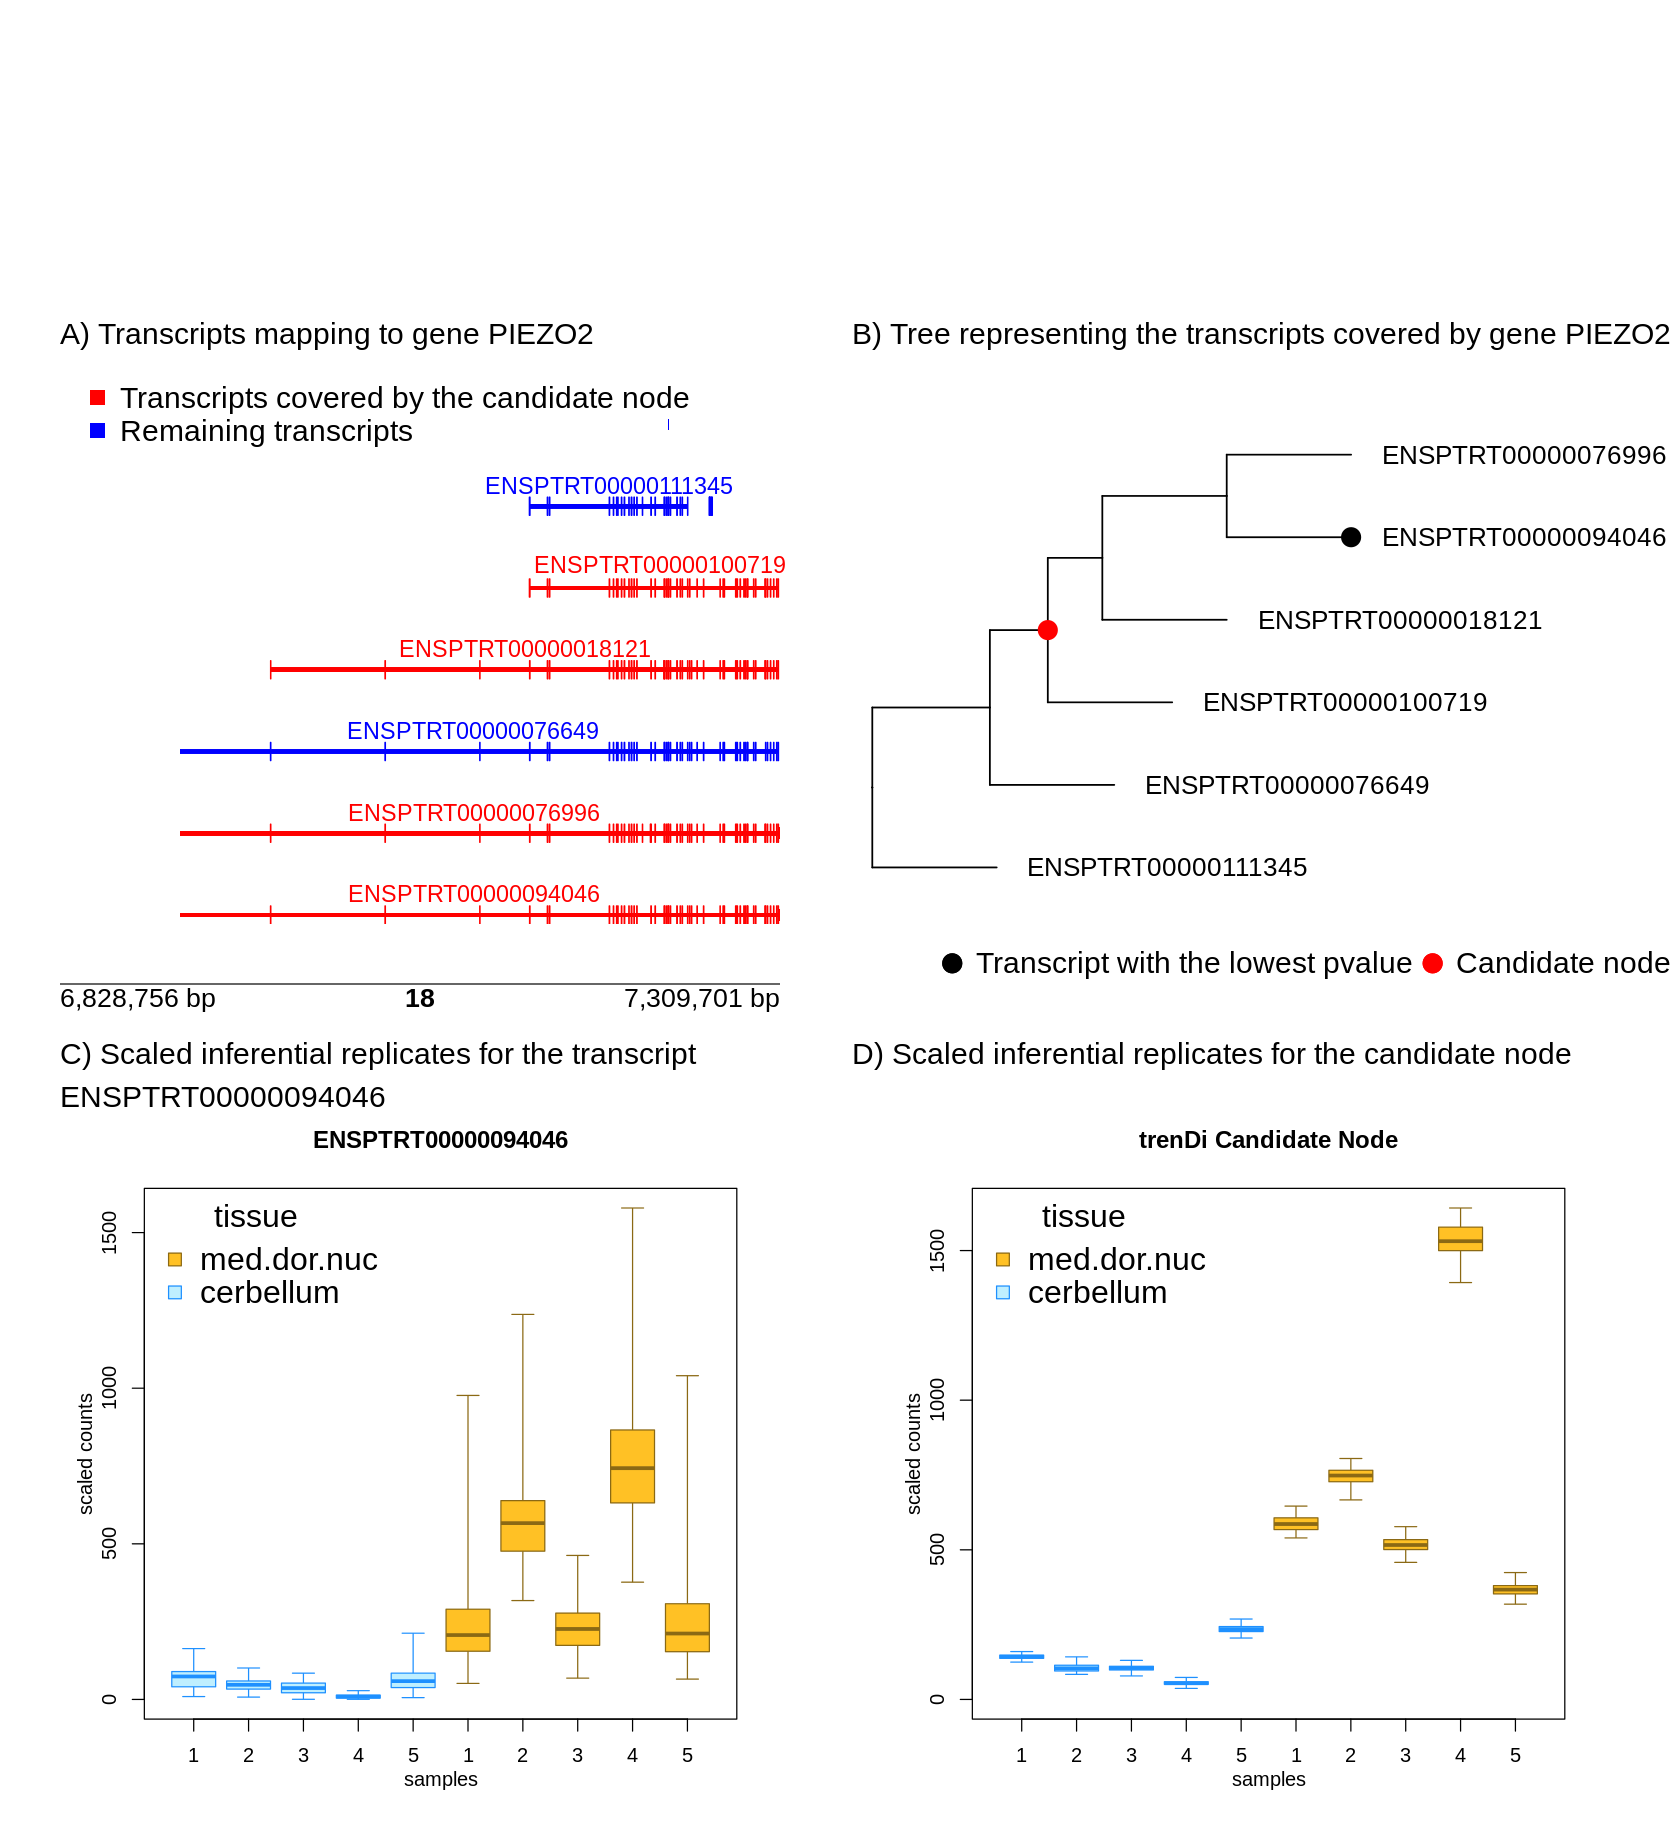

In [13]:
i <- 1
j <- 62

tt <- extPreInf(tseChimp, y, treeDE, treeDECommonInds, txpChimp, genesChimp, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="left",x="tissue")
pTree <- plotTree(tt$tSub, 9, tt$minTInd, of=205, xlim=500)
pgs <- parF(tt$g, tt$txShow, tt$tSub, assemb=assemb, chromSt = -10000, chromEnd = 10)

library(plotgardener)
pageCreate(width = 14, height = 10, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = 18
)#, fontface = "bold")
parTextB <- pgParams(
    fontcolor="red", fontsize = 14
)#, fontface = "bold")

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the candidate node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.4, width = 1, height = 0.7,
    just = c("left", "top"), fontsize=18,
)
plotText(label="A) Transcripts mapping to gene PIEZO2", x = 0.5, y = 0,
        params = parText)

plotTranscripts(
    params = par, x = 1.5, y = 5, width = 5, height = 6.5, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)

plotText(label="ENSPTRT00000100719", x = 5.5, y = 2,
        params = parTxpR)

plotGenomeLabel(
  params = par, x = 0.5, y = 5.5, length=6,
  just = c("left", "top"), fontsize=16
)

plotText(label="B) Tree representing the transcripts covered by gene PIEZO2", 
         x = 7.1, y = 0, params = parText)
plotGG(
    plot = pTree,
    x = 6.8, y =0.6, width = 8, height=5
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSPTRT00000094046", 
         x = 0.5, y = 6, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 6.5, width = 6, height=6
)

plotText(label="D) Scaled inferential replicates for the candidate node", 
         x = 7.1, y = 6, params = parText)

plotGG(
    plot = pI[[2]],
    x = 7.4, y = 6.5, width = 6, height=6
)

[1] "ENSPTRT00000103768" "ENSPTRT00000106540"
[1] "Genes ENSPTRG00000014167"
            tx_name1             tx_name2             tx_name3 
"ENSPTRT00000026466" "ENSPTRT00000078307" "ENSPTRT00000077349" 
            tx_name4             tx_name5 
"ENSPTRT00000103768" "ENSPTRT00000106540" 
[1] "ENSPTRT00000077349" "ENSPTRT00000026466" "ENSPTRT00000078307"
[4] "ENSPTRT00000103768" "ENSPTRT00000106540"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

text[text2]

text[text2]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



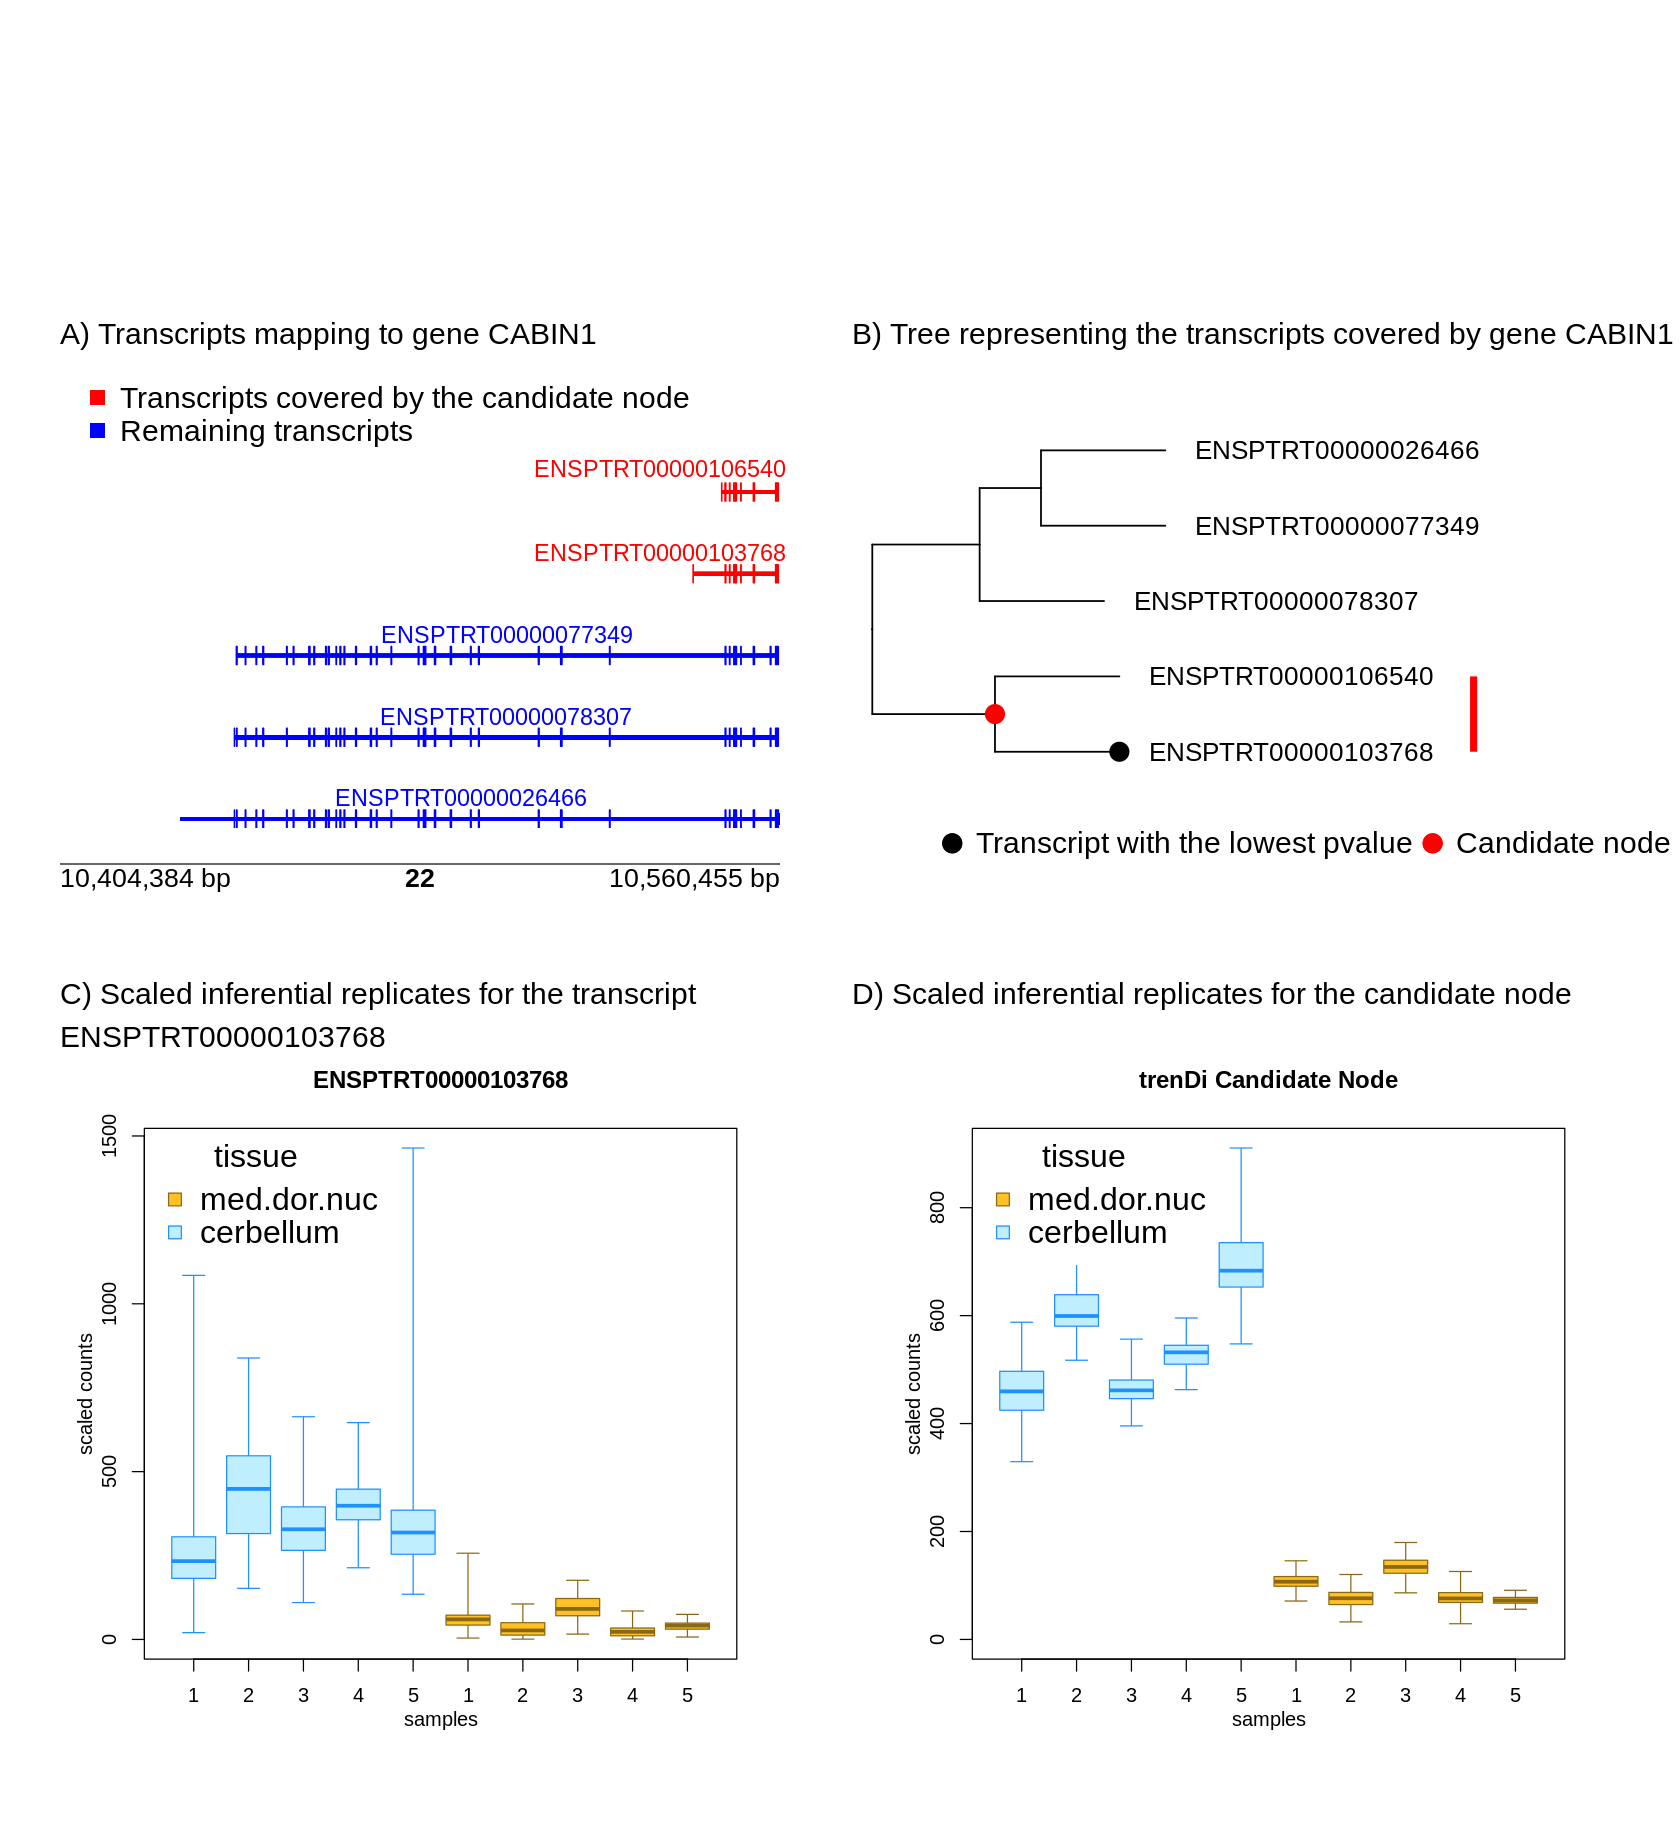

In [14]:
i <- 1
j <- 230

tt <- extPreInf(tseChimp, y, treeDE, treeDECommonInds, txpChimp, genesChimp, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="left",x="tissue")
pTree <- plotTree(tt$tSub, 9, tt$minTInd, of=205, xlim=500)
pgs <- parF(tt$g, tt$txShow, tt$tSub, assemb=assemb, chromSt = -10000, chromEnd = 10)

library(plotgardener)
pageCreate(width = 14, height = 10, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = 18
)#, fontface = "bold")

parTxp  <- pgParams(
    fontsize = 14,
    fontcolor="red"
)

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the candidate node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.4, width = 1, height = 0.7,
    just = c("left", "top"), fontsize=18,
)
plotText(label="A) Transcripts mapping to gene CABIN1", x = 0.5, y = 0,
        params = parText)

plotTranscripts(
    params = par, x = 1.5, y = 4.2, width = 5, height = 6.5, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)
plotText(label="ENSPTRT00000106540", x = 5.5, y = 1.2,
        params = parTxp)
plotText(label="ENSPTRT00000103768", x = 5.5, y = 1.9,
        params = parTxp)

plotGenomeLabel(
  params = par, x = 0.5, y = 4.5, length=6,
  just = c("left", "top"), fontsize=16
)

plotText(label="B) Tree representing the transcripts covered by gene CABIN1", 
         x = 7.1, y = 0, params = parText)
plotGG(
    plot = pTree,
    x = 6.8, y =0.6, width = 8, height=4
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSPTRT00000103768", 
         x = 0.5, y = 5.5, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 6, width = 6, height=6
)

plotText(label="D) Scaled inferential replicates for the candidate node", 
         x = 7.1, y = 5.5, params = parText)

plotGG(
    plot = pI[[2]],
    x = 7.4, y = 6, width = 6, height=6
)